In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [29]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(None, (150, 5))

<Axes: >

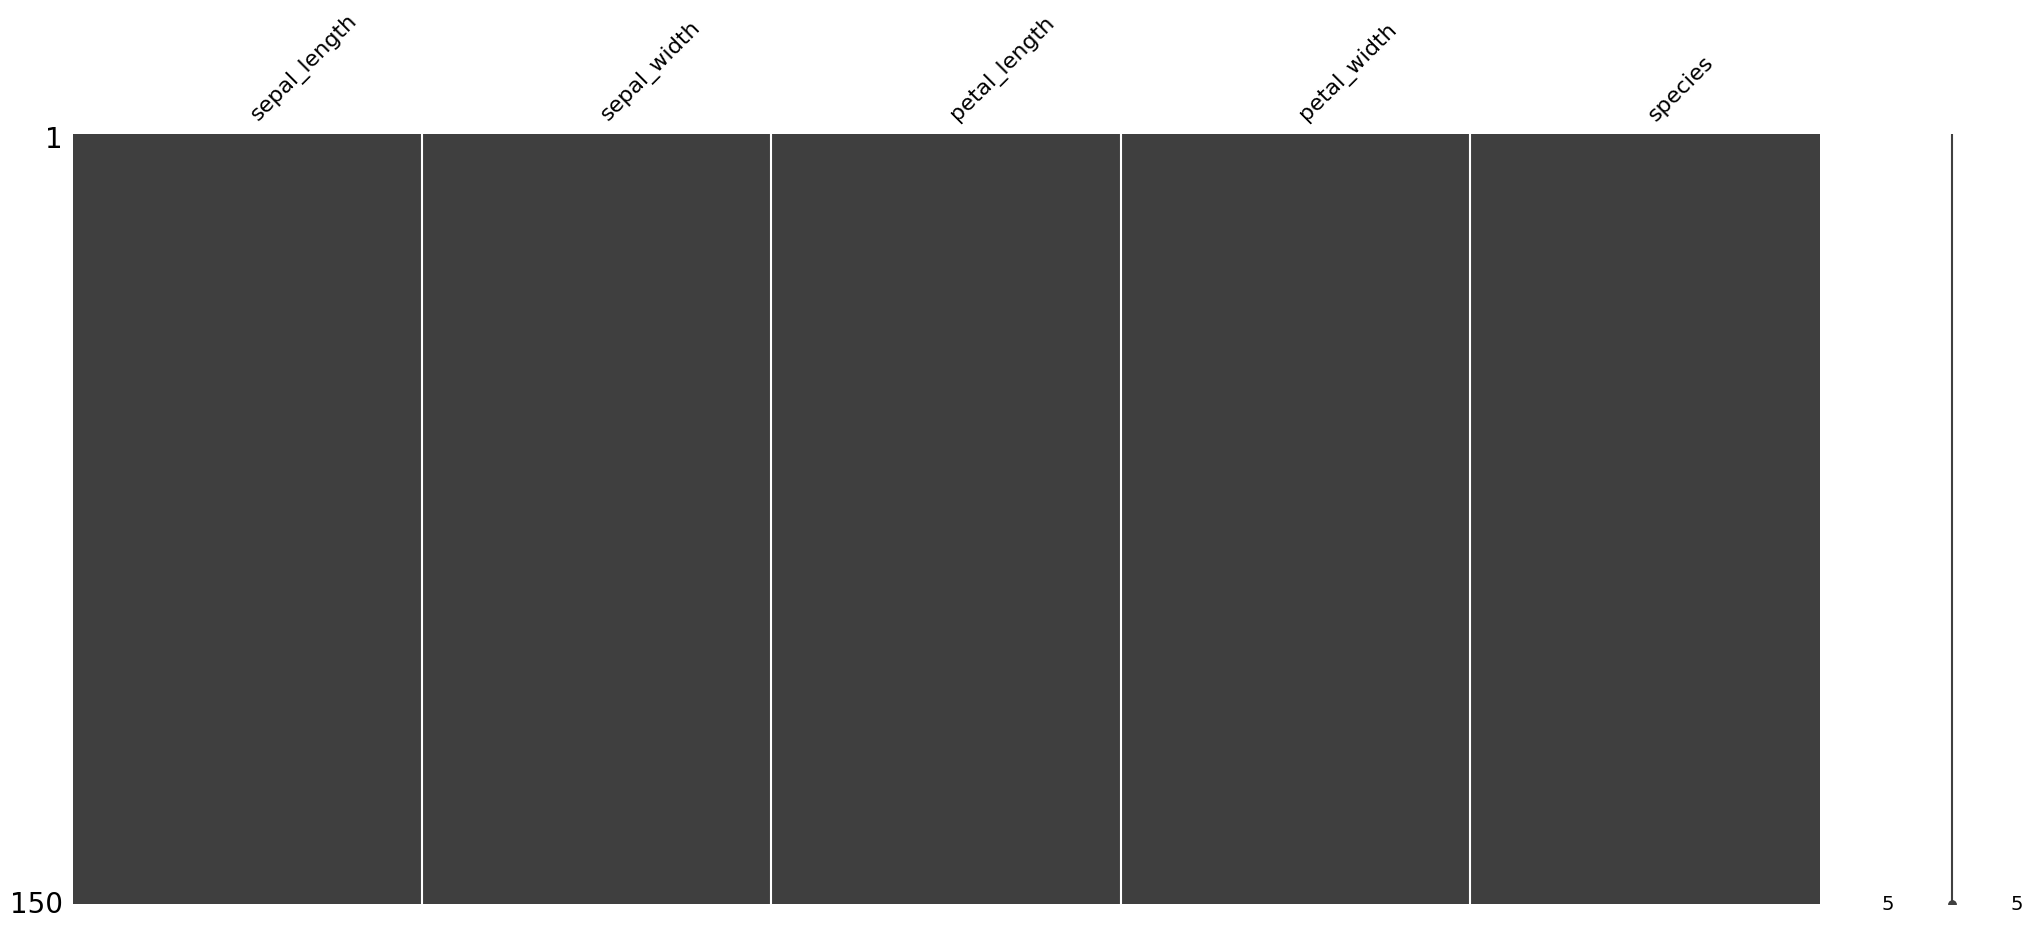

In [28]:
msno.matrix(df)

In [32]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

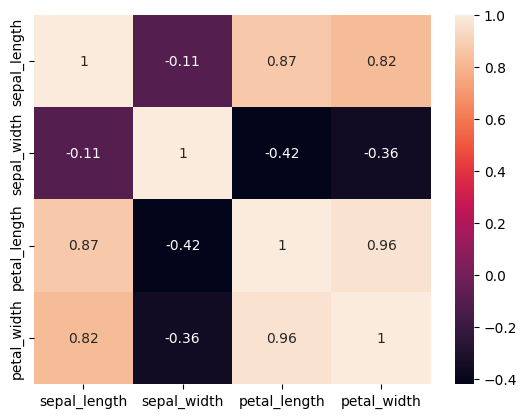

In [40]:
df_num = df.drop(columns=["species"])
sns.heatmap(df_num.corr(), annot=True)

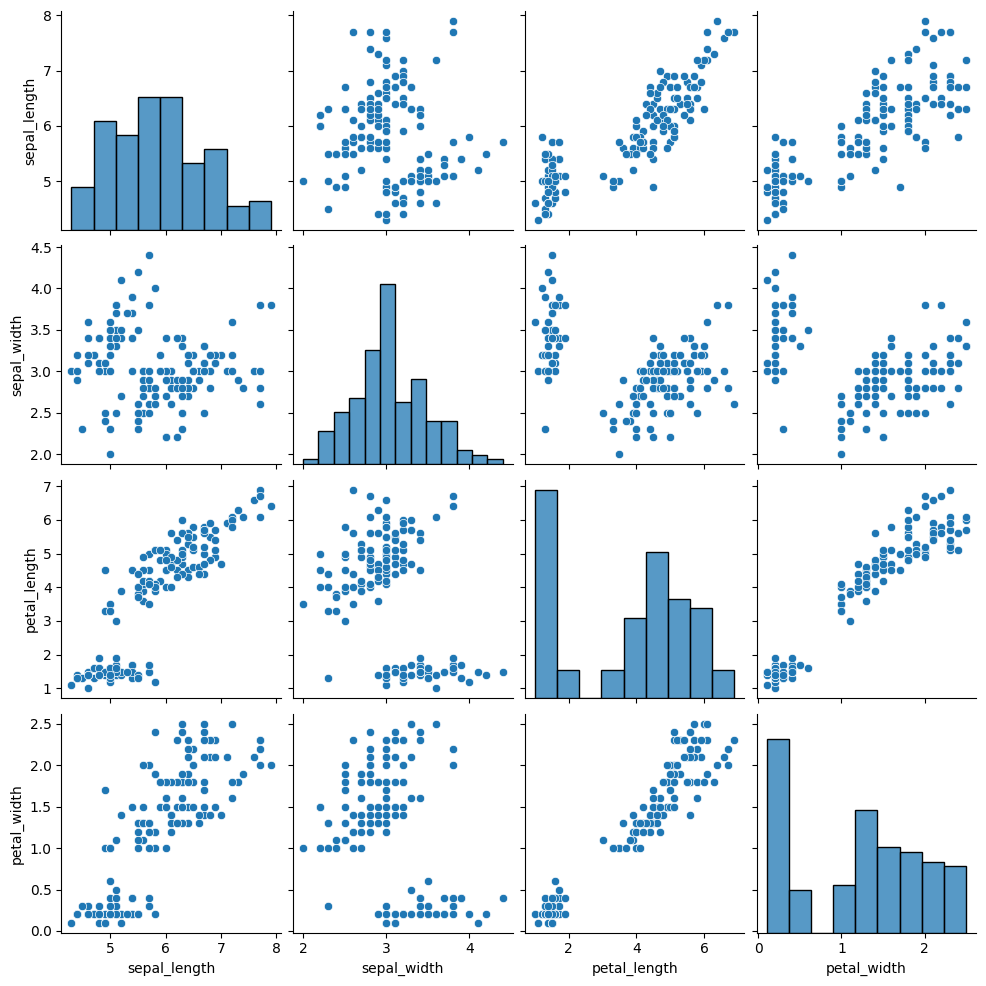

In [42]:
sns.pairplot(df)

In [31]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

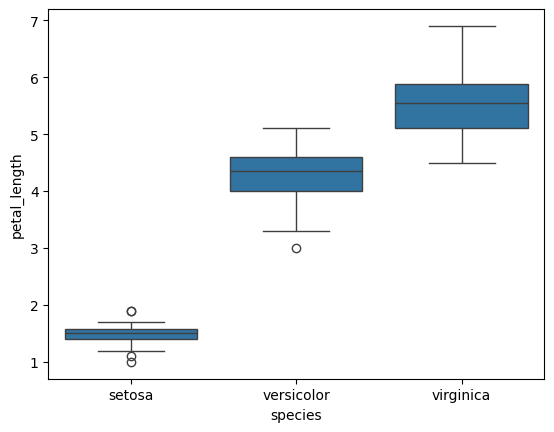

In [33]:
sns.boxplot(x="species",y="petal_length",data=df)
plt.show()

In [8]:
df = df.drop(columns=["species"])
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.03205722e+00, -1.34127240e+00, -1.31297673e+00],
       [-1.24957601e-01, -1.34127240e+00, -1.31297673e+00],
       [ 3.37848329e-01, -1.39813811e+00, -1.31297673e+00],
       [ 1.06445364e-01, -1.28440670e+00, -1.31297673e+00],
       [ 1.26346019e+00, -1.34127240e+00, -1.31297673e+00],
       [ 1.95766909e+00, -1.17067529e+00, -1.05003079e+00],
       [ 8.00654259e-01, -1.34127240e+00, -1.18150376e+00],
       [ 8.00654259e-01, -1.28440670e+00, -1.31297673e+00],
       [-3.56360566e-01, -1.34127240e+00, -1.31297673e+00],
       [ 1.06445364e-01, -1.28440670e+00, -1.44444970e+00],
       [ 1.49486315e+00, -1.28440670e+00, -1.31297673e+00],
       [ 8.00654259e-01, -1.22754100e+00, -1.31297673e+00],
       [-1.24957601e-01, -1.34127240e+00, -1.44444970e+00],
       [-1.24957601e-01, -1.51186952e+00, -1.44444970e+00],
       [ 2.18907205e+00, -1.45500381e+00, -1.31297673e+00],
       [ 3.11468391e+00, -1.28440670e+00, -1.05003079e+00],
       [ 1.95766909e+00, -1.39813811e+00

## First cluster

In [23]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
df["type"] = labels
df.head(), df.tail()

(   sepal_length  sepal_width  petal_length  petal_width  type
 0           5.1          3.5           1.4          0.2     1
 1           4.9          3.0           1.4          0.2     1
 2           4.7          3.2           1.3          0.2     1
 3           4.6          3.1           1.5          0.2     1
 4           5.0          3.6           1.4          0.2     1,
      sepal_length  sepal_width  petal_length  petal_width  type
 145           6.7          3.0           5.2          2.3     0
 146           6.3          2.5           5.0          1.9     0
 147           6.5          3.0           5.2          2.0     0
 148           6.2          3.4           5.4          2.3     0
 149           5.9          3.0           5.1          1.8     0)

In [11]:
df.groupby('type').mean()

,sepal_length,sepal_width,petal_length,petal_width
type,,,,
0,7.012500,3.116667,6.000000,2.154167
1,5.183871,3.641935,1.500000,0.280645
2,6.079310,2.896552,4.458621,1.400000
3,5.505882,2.500000,3.735294,1.135294
4,6.266667,2.863333,5.126667,1.866667
5,4.715789,3.052632,1.405263,0.184211


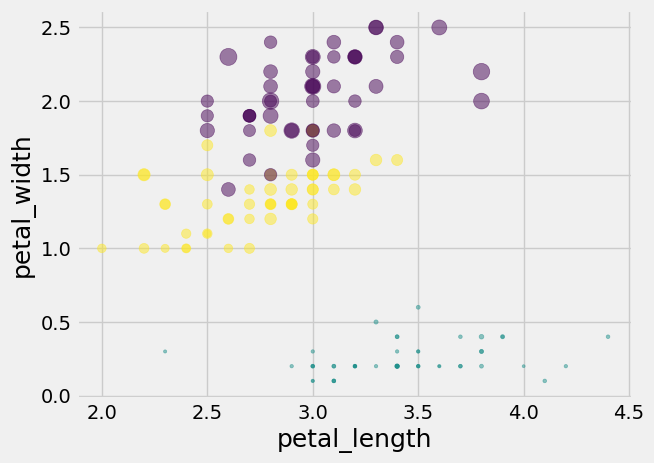

In [20]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 2], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('petal_length', fontsize=18)
plt.ylabel('petal_width', fontsize=18)

plt.show()

In [21]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

## Elbow method

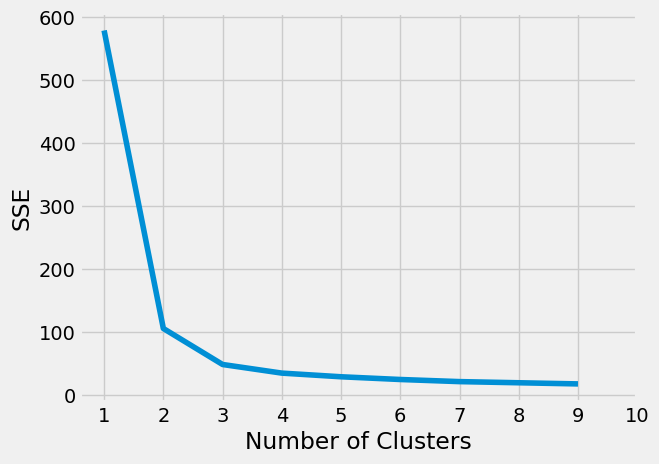

In [15]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [65]:
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients

[np.float64(0.7288524281112335),
 np.float64(0.5929969651467056),
 np.float64(0.5326977005082737),
 np.float64(0.4962075205529461),
 np.float64(0.36297491234143014),
 np.float64(0.3432690040548609),
 np.float64(0.3385043493436017),
 np.float64(0.3448414490217598)]

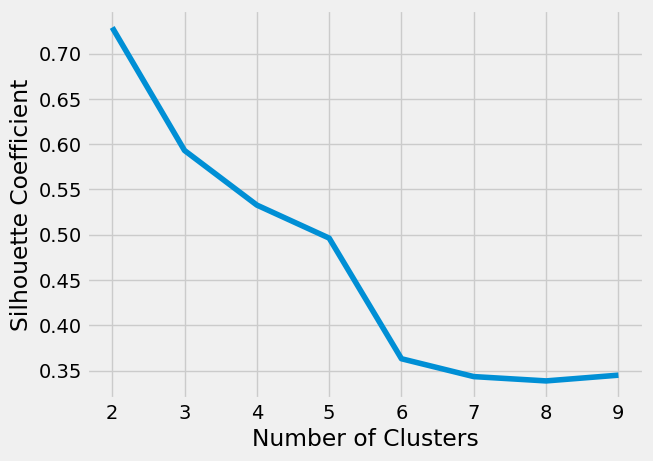

In [66]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

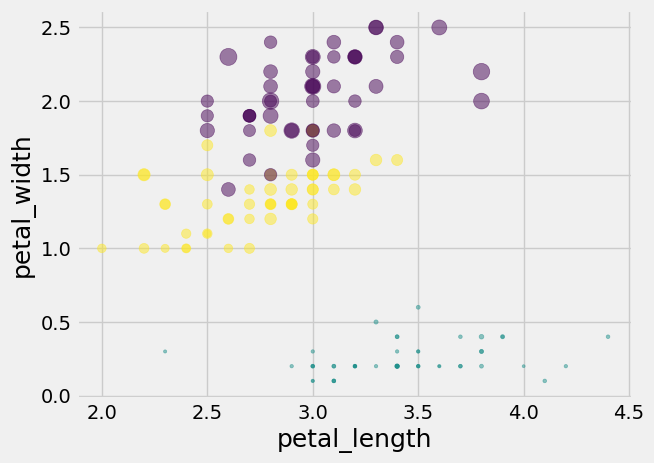

In [22]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 2], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('petal_length', fontsize=18)
plt.ylabel('petal_width', fontsize=18)

plt.show()

## Second cluster

In [39]:
df = df.drop(columns=["species"])

X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 2 2 0 2 0 0 0 0 2 0 2 2 0 0 0 2 0 2 2
 0 2 2 2 2 0 0 0 0 2 2 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 3 2 3 3 3 3 2 3 3 3 2
 2 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 2 3 3 3 2 3 3 2 2 3 3 3 2 2
 3 2]


In [40]:
df['type'] = labels
print(df['type'].unique())

[1 2 0 3]


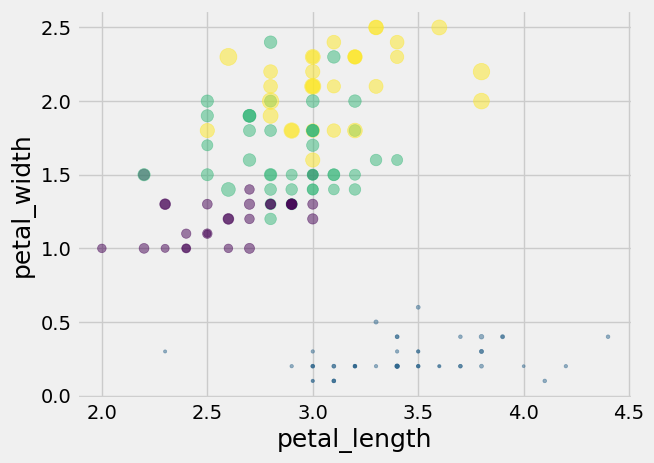

In [41]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 2], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('petal_length', fontsize=18)
plt.ylabel('petal_width', fontsize=18)

plt.show()

In [42]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init= "k-means++",n_init= 12,max_iter= 300)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

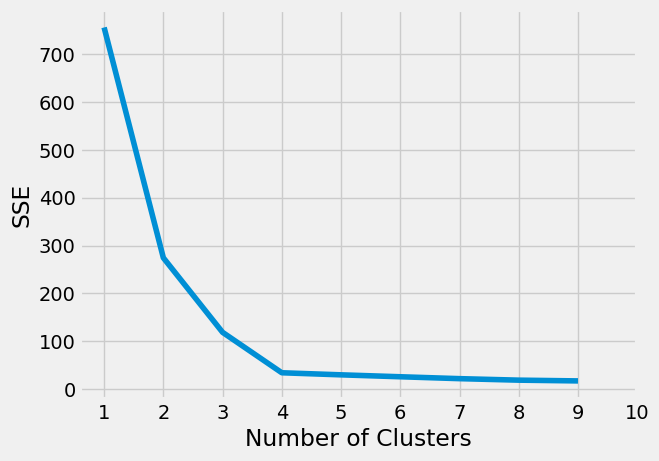

In [43]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()